In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../Datasets/class_exercise/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [5]:
# Target Variable -> Exited
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], dtype="int8", drop_first=True)

In [7]:
df.shape

(10000, 12)

In [8]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [11]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
x_train.shape

(7000, 11)

In [13]:
x_test.shape

(3000, 11)

In [26]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler

Minscaler = MinMaxScaler()
mn=Minscaler.fit(x_train)

x_train_std=mn.transform(x_train)
x_test_std=mn.transform(x_test)

In [27]:
# Model architecture
import tensorflow as tf
from tensorflow.keras import backend as K       # Kill the backend of Keras to run new approach
from tensorflow.keras.models import Sequential   # sequentail model
from tensorflow.keras.layers import Dense        # Neural Network
from tensorflow.keras.optimizers import Adam, SGD, RMSprop     # Oprimizer

K.clear_session()
model=Sequential()
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=11))   # input Layer
# model.add(Dropout(0.25))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))                    # Hidden Layer
# model.add(Dense(units=2, activation='relu', kernel_initializer='uniform'))                    # Hidden Layer
model.add(Dense(units=1, activation="sigmoid",kernel_initializer='uniform'))               # Output Layer

model.summary()

/opt/homebrew/Caskroom/miniconda/base/envs/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy", metrics=["accuracy"] )
# model.compile(optimizer="adam",loss="binary_crossentropy", metrics="accuracy" )

In [29]:
hist=model.fit(x_train_std, y_train, batch_size=32, epochs=20,
          validation_data=(x_test_std, y_test)) # 200 epocs

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7852 - loss: 0.6519 - val_accuracy: 0.7930 - val_loss: 0.5059
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8013 - loss: 0.4919 - val_accuracy: 0.7930 - val_loss: 0.4946
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7998 - loss: 0.4855 - val_accuracy: 0.7930 - val_loss: 0.4853
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8056 - loss: 0.4644 - val_accuracy: 0.7930 - val_loss: 0.4759
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8029 - loss: 0.4611 - val_accuracy: 0.7977 - val_loss: 0.4656
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8046 - loss: 0.4638 - val_accuracy: 0.8007 - val_loss: 0.4600
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8005 - loss: 0.4562 - val_accuracy: 0.8000 - val_loss: 0.4562
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8043 - loss: 0.4446 - val_accu

In [30]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

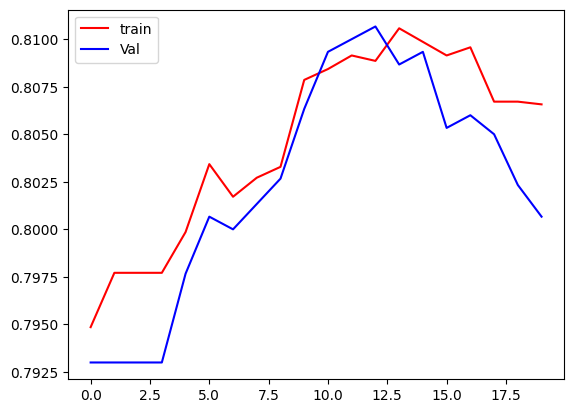

In [31]:
plt.plot(hist.history['accuracy'], color="red", label="train")
plt.plot(hist.history['val_accuracy'],color="blue", label="Val")
plt.legend()
plt.show()